In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tely10.csv')
df1['gun_time_hours']= df1['gun_time'].apply(lambda x: int(x[0]) + int(x[2:4])/60 + int(x[6:8])/3600)
df1['chip_time_hours']= df1['chip_time'].apply(lambda x: int(x[0]) + int(x[2:4])/60 + int(x[6:8])/3600)

In [ ]:
df1

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place,gun_time_hours,chip_time_hours
0,2019,Colin Fewer,3492,Paradise,0:49:49,0:49:49,1,1,LM40-44,1/170,0.819167,0.819167
1,2019,Graydon Snider,1477,Montreal,0:51:11,0:51:11,2,2,LM35-39,1/216,0.850278,0.850278
2,2019,Matt Noseworthy,2431,St. John's,0:51:13,0:51:13,3,3,LM20-24,1/83,0.850833,0.850833
3,2019,Blaine Penny,977,Calgary,0:53:42,0:53:40,4,4,LM45-49,1/161,0.883889,0.883333
4,2019,Anne Johnston,1653,St. John's,0:54:25,0:54:24,5,1,LF35-39,1/312,0.901389,0.901111
...,...,...,...,...,...,...,...,...,...,...,...,...
46649,2005,Angela Hammond,1296,Mount Pearl,2:57:26,2:55:07,1660,785,LF30-34,105/105,2.951667,2.918611
46650,2005,Colette Price,1078,St. John's,3:01:08,2:58:54,1661,786,LF45-49,111/113,3.018889,2.967778
46651,2005,Diana Deacon,33,St. John's,3:02:07,3:00:21,1662,787,LF45-49,112/113,3.035278,3.000278
46652,2005,Brenda Walsh,767,St. John's,3:03:06,3:00:56,1663,788,LF45-49,113/113,3.051667,3.001667


# How successful has the Tely 10 been over this (2005-2019) 15 year period?

## Visualisation-1: Who Tely-10, What Tely-10, How Tely-10?

I don't understand race. When I was confident that race is all about people running a distance, one running faster than another, I was assigned this project and I started doubting my definition of fastness; which fastness - the one based on gun-time or chip-time? There are two different types of time? So, ummm, what is the difference? Which one is the "main" time? This required me to google and read through the black and white texts. Yes, I will tell you the answers too but with a bit more colors that what I had to go through. And I justify the figures below as one visualisation because all these are just to say what the story is about instead of what the story is.

<Axes: xlabel='overall_place', ylabel='gun_time_hours'>

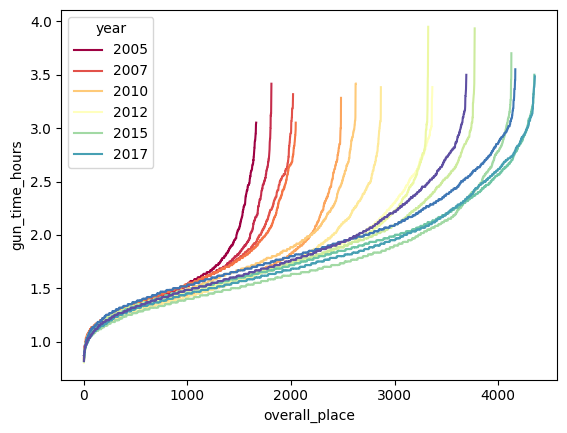

In [ ]:
sns.lineplot(df1, x='overall_place', y='gun_time_hours', hue='year', palette='Spectral')

<Axes: xlabel='overall_place', ylabel='chip_time_hours'>

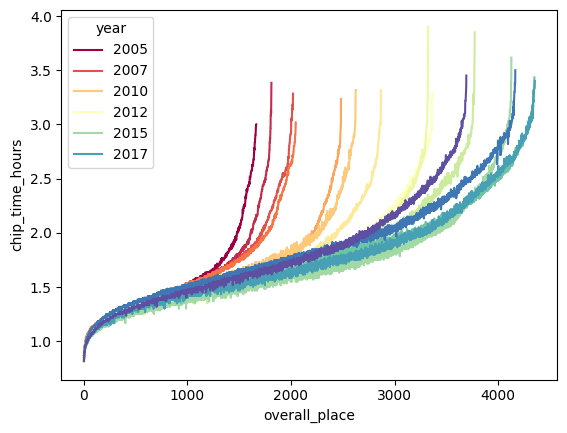

In [ ]:
sns.lineplot(df1, x='overall_place', y='chip_time_hours', hue='year', palette='Spectral')

Observations:

1) Difference between gun-time and chip-time is more visible for more recent years. I can think of two possible reasons:

- Number of racers (roughly) increased with time so some racers take position behind others
- Technology was not precise enough to record an accurate chip-time in older days

2) Winner is decided based on gun-time. The thickness of lines in the chip_time plot is actually a compressed zig-zag.

- I personally find this observation interesting because although I googled the difference between the gun-time and chip-time, it was not clear until visualisation that gun-time is the 'main' time. But from googling what I learned is that: gun-time is the time from the gun-shot to the end-line; chip-time is the time from crossing start-line to reaching end-line.
- This also tells another story. Notice how the depth of 'zigzag' increases around the middle positions. This means that the racer in first position still has a better chip-time than second position; the racer in last position still has a worse chip-time than second-last position.
- The chip-time graph shape is same as gun-time graph shape. Meaning, the chip-time looks like zig-zags following the gun-time-graph path.

3) 2017 had the highest number of runners

Story behind it: "...it celebrated its 90th running on July 23 under pleasant weather conditions with sunny skies and 14 degree temperatures."

4) There was a fall in the number of racers (that seemed to increase every year) in 2018.

Story: "Sunday, July 22, race day, was quite warm and very humid..."

5) There was again a fall in the number of racers (that seemed to increase every year) in 2019.

Story: "Perhaps inclement weather in May and June being the reason many decided to take a pass on the event this year."

6) Number of runners in 2013 was slightly less than that in 2012. 2013 saw the slowest runner in the 15 years.

Citation: All the phrases in quotations above were taken from [the Tely-10 website](https://www.nlaa.ca/tely10/history/)

Justifications:
- Lecture 20 says, "A common mistake is to use hue (colour) to represent quantitative data." However, in the visualisation above, I treated year as qualitative and discrete lines.

When you see the two plots above, think of it in this way: The gun time is increasing in various rates along the x-axis, but  along the x-axis, the pitch-time is sometimes increasing and sometimes decreasing (creating the zig-zag). So will we be missing anything by not considering pitch-time? Does pitch-time tell a completely different story and is Tely-10 unsuccessful in deciding player positions as the positions are only based on gun-time? The answer is:

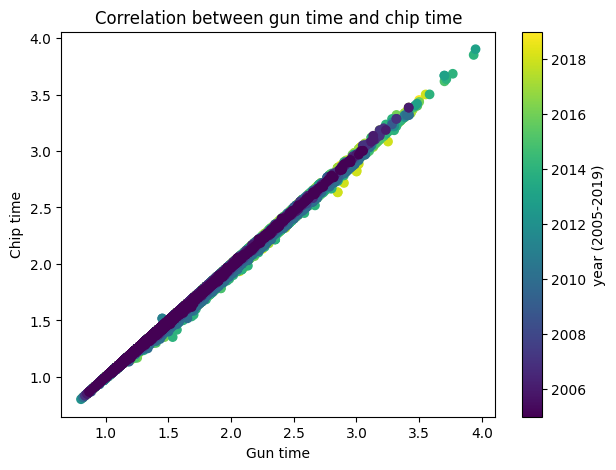

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))
ax1.set_title('Correlation between gun time and chip time')
ax1.set_ylabel('Chip time')
ax1.set_xlabel('Gun time')
ax1.set_yscale('linear')
ax1.set_xscale('linear')

im=ax1.scatter(x=df1['gun_time_hours'], y=df1['chip_time_hours'], c=df1['year'])
fig.colorbar(im, ax=ax1, label="year (2005-2019)")

There is a strong positive correlation between gun-time and chip-time, so these two can never tell two different stories. Now, do I have your permission to put the final nail on the coffin of pitch-time and move on to next visualizations with just gun-time as the only time?

Justifications:
- In the time-vs-overall-position line plots, I used rainbow color palette, because I want the observer to notice every year and see as many stories as they can. In the chip-vs-gun scatter plot, I did not give much effort on the palette because year is not the focus: there is just a simple question that needs to be answered. So what was the need of a palette anyway? Just to give a very rough idea about which point belongs to which year. For example: we see two scatter dots with the highest gun and chip time. Because of its greenish hue, the observer can have a rough idea that the two points are for some two years between 2012 and 2016. That's enough story: the observer may decode from the line plots that those two years must be 2013 and 2014 - no need to know more than this; because my next stories will talk about them - let some climax build for now.

## Visualisation-2: "Man Vs Woman" or "Man+Woman"?

There have been research, biological facts and what not about it, but I am going to ask this one more time: Are males "overall" better in running than females?

The figure below shows the range of time males took to run vs the range of time females took to run in every year.

In [ ]:
first_last = df1.groupby(by='year').agg(['first', 'last'])
first_last.reset_index()

year           name                        bib                city  \
                  first                 last first  last         first   
0   2005    Colin Fewer  Marion Counsel-Dawe  1449   881  Harbour Main   
1   2006    Colin Fewer        Clarice Maher   567  1035  Harbour Main   
2   2007    Colin Fewer           Paul O'Dea  1088   994  Harbour Main   
3   2008    Colin Fewer         Gerry Conran   207  2011      Paradise   
4   2009    Colin Fewer       Pamela Noftall   406   483      Paradise   
5   2010    Colin Fewer        Ashley Kieley  1769  1934      Paradise   
6   2011    Colin Fewer         Krista Legge  2269  2375      Paradise   
7   2012  Matt Loiselle          Jean Hewson  2724  3391       Toronto   
8   2013  Daniel McNeil      Charles O'Keefe   950  2014     Glace Bay   
9   2014    Colin Fewer          Lucy Norris  4206  2790      Paradise   
10  2015  Matt Loiselle         Joanne Smith  3662  1121       Toronto   
11  2016    Colin Fewer           Hope Green  4782     3      Paradise   
12  2017    Colin Fewer         Karen Greene  3146  3243      Paradise   
13  2018    Colin Fewer          Bill Peddle  4537  2520      Paradise   
14  2019    Colin Fewer          Pam Starkes  3492  2082      Paradise   

                gun_time          chip_time  ... gender_place       division  \
           last    first     last     first  ...        first  last    first   
0    St. John's  0:52:05  3:03:07   0:52:04  ...            1   789  LM25-29   
1        Oshawa  0:51:28  3:25:30   0:51:25  ...            1   880  LM25-29   
2    St. John's  0:50:11  3:19:17   0:50:11  ...            1  1018  LM30-34   
3   Mount Pearl  0:51:22  3:03:47   0:51:22  ...            1  1022  LM30-34   
4    St. John's  0:50:41  3:17:23   0:50:38  ...            1  1314  LM30-34   
5    St. John's  0:49:48  3:25:05   0:49:48  ...            1  1433  LM30-34   
6    St. John's  0:51:19  3:23:13   0:51:19  ...            1  1671  LM30-34   
7    St. John's  0:48:09  3:23:17   0:48:09  ...            1  1973  LM25-29   
8           CBS  0:51:11  3:57:50   0:51:10  ...            1  1407  LM25-29   
9   Mount Pearl  0:50:52  3:56:56   0:50:50  ...            1  2224  LM35-39   
10   St. John's  0:49:28  3:42:28   0:49:25  ...            1  2479  LM30-34   
11   St. John's  0:50:26  3:30:32   0:50:26  ...            1  2631  LM35-39   
12     Paradise  0:49:41  3:29:58   0:49:41  ...            1  2682  LM40-44   
13          CBS  0:52:05  3:33:17   0:52:05  ...            1  1650  LM40-44   
14       Goulds  0:49:49  3:30:40   0:49:49  ...            1  2168  LM40-44   

            division_place          gun_time_hours           chip_time_hours  \
       last          first     last          first      last           first   
0   LF50-54           1/58    68/68       0.868056  3.051944        0.867778   
1   LF55-59           1/61    37/37       0.852222  3.416667        0.851389   
2   LM20-24          1/119    49/49       0.833611  3.318611        0.833611   
3   LM70-74          1/101      7/7       0.850556  3.051944        0.850556   
4   LF45-49          1/142  163/163       0.833611  3.284167        0.835556   
5   LF25-29          1/133  196/196       0.818889  3.418056        0.818889   
6   LF30-34          1/131  248/248       0.852500  3.384167        0.852500   
7   LF50-54          1/137  202/202       0.802500  3.385278        0.802500   
8   LM35-39          1/139  207/207       0.850278  3.950000        0.850000   
9   LF55-59          1/222  141/141       0.833889  3.935000        0.833333   
10  LF35-39          1/207  397/397       0.818889  3.702222        0.818056   
11  LF55-59          1/219  191/191       0.835000  3.500556        0.835000   
12  LF55-59          1/218  183/183       0.816944  3.485556        0.816944   
13  LM40-44          1/195  195/195       0.868056  3.551944        0.868056   
14  LF40-44          1/170  327/327       0.819167  3.500000        0.819167   

              
        

In [ ]:
first_positions_gender=df1[df1['gender_place']==1][['gun_time_hours', 'chip_time_hours', 'year', 'division']]
first_positions_male=first_positions_gender[first_positions_gender['division'].str.startswith('LM')].reset_index()
first_positions_female=first_positions_gender[first_positions_gender['division'].str.startswith('LF')].reset_index()
last_positions_male=df1[df1['division'].str.startswith('LM')].groupby('year').last().reset_index()
last_positions_female=df1[df1['division'].str.startswith('LF')].groupby('year').last().reset_index()

Text(4, 2014, 'Lucy Norris')

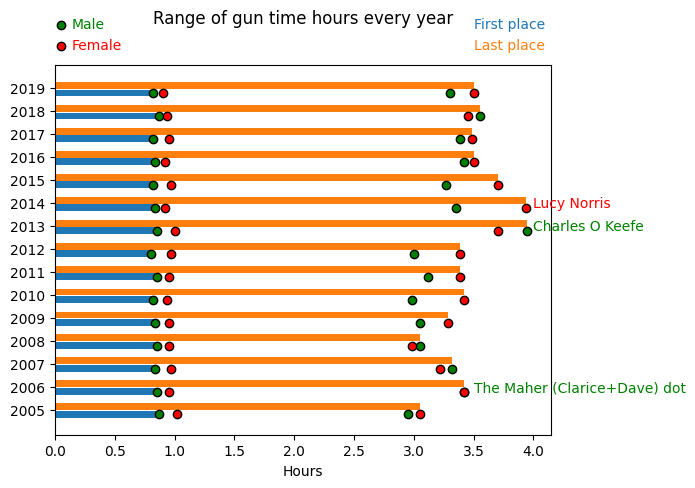

In [ ]:
fig, ax = plt.subplots()

ax.barh(first_last.index, first_last[(  'gun_time_hours', 'first')], 0.3, label='First place')
ax.barh(first_last.index + 1/3, first_last[(  'gun_time_hours', 'last')], 0.3, label='Last place')
ax.scatter(first_positions_male['gun_time_hours'], first_positions_male['year'], edgecolors='#000000', c='g', label='Male')
ax.scatter(first_positions_female['gun_time_hours'], first_positions_female['year'], edgecolors='#000000', c='r', label='Female')
ax.scatter(last_positions_male['gun_time_hours'], last_positions_male['year'], edgecolors='#000000', c='g')
ax.scatter(last_positions_female['gun_time_hours'], last_positions_male['year'], edgecolors='#000000', c='r')
ax.set(yticks=first_last.index + 0.2, yticklabels=first_last.index)
#ax.set(xticks=[2*i for i in range(0, 10)])
ax.set_xlabel('Hours')

ax.legend(labelcolor='linecolor', bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0., handlelength=0, frameon=False)


ax.set_title("Range of gun time hours every year", pad=30)

ax.text(3.5, 2006, 'The Maher (Clarice+Dave) dot', c='g')
ax.text(4, 2013, 'Charles O Keefe', c='g')
ax.text(4, 2014, 'Lucy Norris', c='r')

Observations:

- If you really want to win the race, learn to complete 10 miles in 1 hour
- You do not have to be a pro to run in this race. There are people who took 4 hours to complete the 10 miles - basically they were walking. [For most healthy adults, the average walking speed is about 3 miles per hour (mph).](https://www.medicalnewstoday.com/articles/average-walking-speed)
- The fastest man is always faster than the fastest woman but the difference is not as big as the difference between the slowest man and the slowest woman.
- 2013 saw the slowest man and 2014 saw the slowest woman in the given period (we talked about this 2013 and 2014 in visualisation-1 too but now we have slightly more information - about the genders).
- In 2006, the last-position-man (Dave Maher) and last-position-woman (Clarice Maher) took exactly same time! From a bit of research I found that Clarice was fighting cancer and David was the love of her life and her best friend, David Maher, her husband. 2006 was Clarice's first time running Telly-10. In 2015, the year that saw Clarice running Telly-10 for the last time, Dave Maher again took part in the race, and got the last gender position but was faster than the female who came last. This was because the female who came last was not Clarice. Clarice had a better gun-time in 2015 and David was staying behind. Dave ran in Telly-10 only two times in the given period: the year when Clarice first ran in Telly-10 (2006) and the year when Clarice last ran Telly-10 (2015). She died in 2018. Looks like there was a wholesome story that was missed to be covered, but hey at least we have this data!
Citation: https://www.legacy.com/ca/obituaries/northumberlandnews/name/clarice-maher-obituary?id=40954930


## Visualisation-3: Charles O' Keefe and Lucy Norris the real record-holders... Colin Fewer who?

Colin Fewer surely is a champ: in the 15 races he won 12 times. However, if you see the plot below, his achievements were because of running narrowly a few seconds less than others.

The real record-holders, that don't usually get the recognision of media as much as the winner males and females, are the names mentioned. The record was made in 2013 and 2014 and no one broke it since then. We saw them (coming in last positions) in visualization-2, but the below visualization of a roughly  positively skewed bell-shaped-looking-curve is important to show that those two runners did not narrowly come last. They were really standing out of the crowd of racers that dissolved in the "curve" below: Now isn't that a success? Who said you have to come first to succeed!

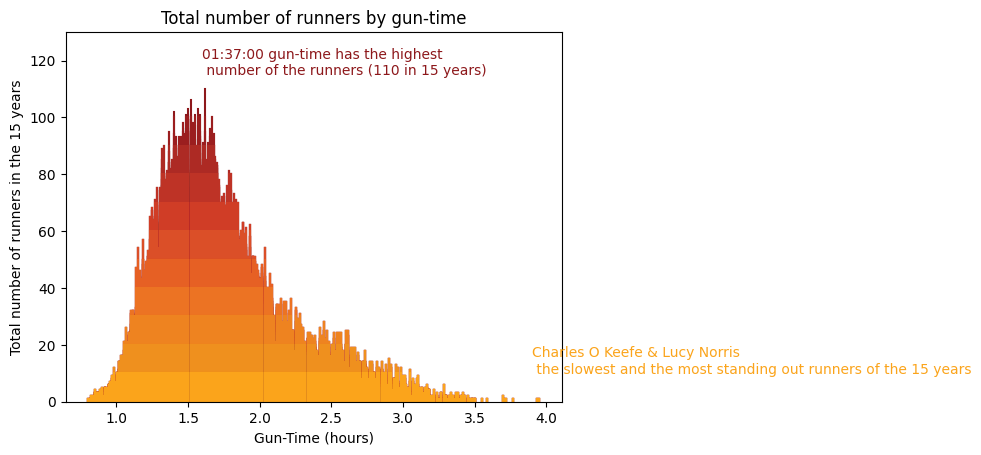

In [ ]:
df3=df1.groupby('gun_time_hours')['year'].count().reset_index()
fig, ax = plt.subplots()
ax.set(title= 'Total number of runners by gun-time', xlabel='Gun-Time (hours)', ylabel='Total number of runners in the 15 years', ylim=(0,130))
ax.text(1.6, 115, '01:37:00 gun-time has the highest \n number of the runners (110 in 15 years)', color='#8d181b')
ax.text(3.9, 10, 'Charles O Keefe & Lucy Norris \n the slowest and the most standing out runners of the 15 years', color='#fba41b')
c1=['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28',
'#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b']
ii0=110
while(ii0>0):
  for j,i in enumerate(df3['gun_time_hours']):
    if(df3['year'][j]>=1):
      if(df3['year'][j]>ii0):
        ax.plot([i, i], [0, ii0], c=c1[ii0//10 -1])
      elif(df3['year'][j]<=ii0):
        ax.plot([i, i], [0, df3['year'][j]], c=c1[ii0//10 -1])
  ii0-=10
